In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mexwell/sudoku-image-dataset")

print("Path to dataset files:", path)

100%|██████████| 66.3M/66.3M [00:00<00:00, 93.3MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/mexwell/sudoku-image-dataset/versions/3


In [2]:
import cv2
import numpy as np

In [3]:
import os

In [4]:
imgPath = os.path.join(path, 'v1_training/v1_training/image1.jpg')

In [5]:
import matplotlib.pyplot as plt

In [6]:
img = cv2.imread(imgPath)

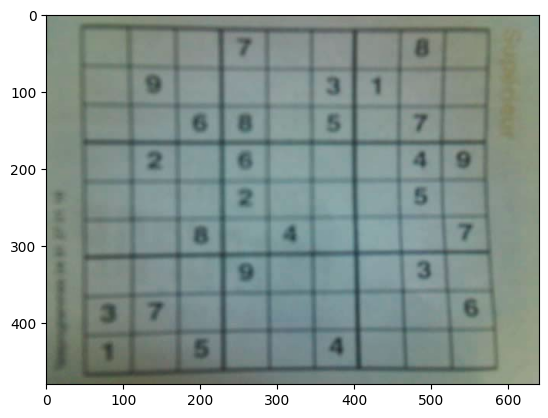

In [7]:
plt.imshow(img)

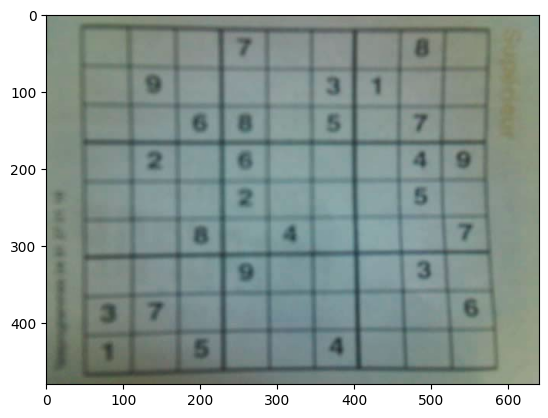

In [8]:
imgPath2 = os.path.join(path, 'v2_train/v2_train/image1.jpg')
img = cv2.imread(imgPath2)
plt.imshow(img)

In [9]:
import random

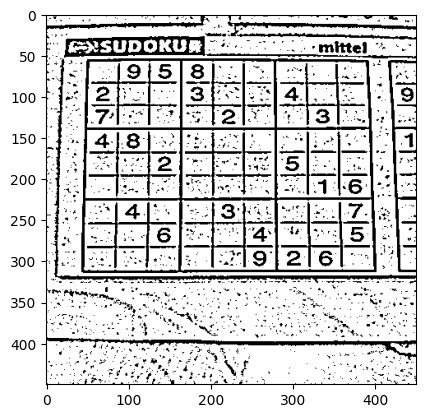

In [15]:
imgPath = os.path.join(path, 'v1_training/v1_training/image1006.jpg')
img = cv2.imread(imgPath)
def preprocess(image):
    image = cv2.resize(image, (450, 450))
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (3, 3), 6)
    # Alternatively, try bilateral filter:
    # blur = cv2.bilateralFilter(gray, 9, 75, 75)
    threshold_img = cv2.adaptiveThreshold(
        blur, 255,
        cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
        cv2.THRESH_BINARY, 11, 2
    )

    return threshold_img

# Apply preprocessing
threshold = preprocess(img)
plt.imshow(threshold, cmap='gray')

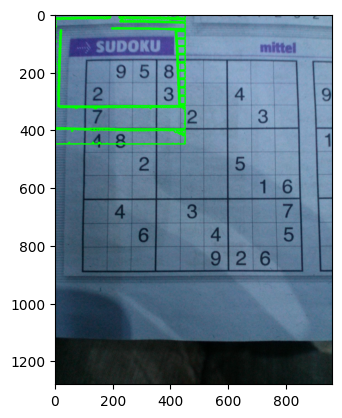

In [16]:
# Copy original image for drawing
contour_1 = img.copy()
contour_2 = img.copy()

# Find contours from thresholded image
contours, hierarchy = cv2.findContours(threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw all contours in green
cv2.drawContours(contour_1, contours, -1, (0, 255, 0), 3)

# Show the image with drawn contours
plt.imshow(contour_1)
plt.show()


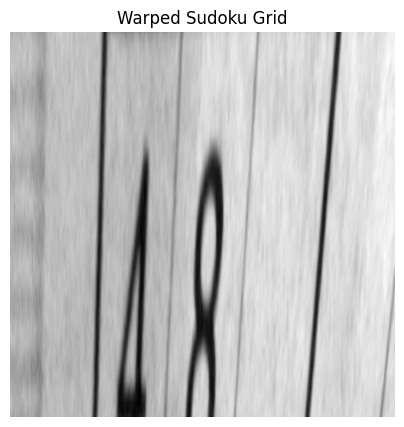

In [17]:
def main_outline(contours):
    biggest = np.array([])
    max_area = 0
    for i in contours:
        area = cv2.contourArea(i)
        if area > 50:
            peri = cv2.arcLength(i, True)
            approx = cv2.approxPolyDP(i, 0.02 * peri, True)
            if area > max_area and len(approx) == 4:
                biggest = approx
                max_area = area
    return biggest, max_area

def reframe(points):
    points = points.reshape((4, 2))
    points_new = np.zeros((4, 1, 2), dtype=np.int32)
    add = points.sum(1)
    points_new[0] = points[np.argmin(add)]       # top-left
    points_new[3] = points[np.argmax(add)]       # bottom-right
    diff = np.diff(points, axis=1)
    points_new[1] = points[np.argmin(diff)]      # top-right
    points_new[2] = points[np.argmax(diff)]      # bottom-left
    return points_new

# Create empty black image for later (optional)
black_img = np.zeros((450, 450, 3), np.uint8)

# Get the largest contour
biggest, maxArea = main_outline(contours)

if biggest.size != 0:
    biggest = reframe(biggest)
    cv2.drawContours(contour_2, [biggest], -1, (0, 255, 0), 10)

    # Perspective Transform
    pts1 = np.float32(biggest)
    pts2 = np.float32([[0, 0], [450, 0], [0, 450], [450, 450]])
    matrix = cv2.getPerspectiveTransform(pts1, pts2)

    imagewrap = cv2.warpPerspective(img, matrix, (450, 450))  # Use original image
    imagewrap = cv2.cvtColor(imagewrap, cv2.COLOR_BGR2GRAY)

    # Show warped Sudoku
    plt.figure(figsize=(5,5))
    plt.imshow(imagewrap, cmap='gray')
    plt.title("Warped Sudoku Grid")
    plt.axis('off')
    plt.show()
else:
    print("Could not find a valid Sudoku grid.")


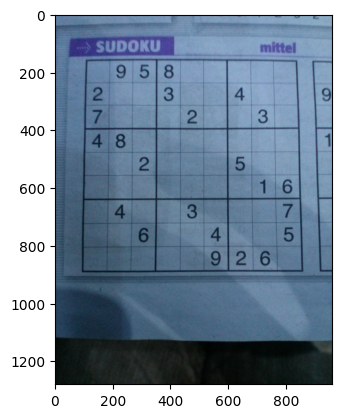

In [18]:
imgPath = os.path.join(path, 'v1_training/v1_training/image1006.jpg')
puzzle = cv2.imread(imgPath)
#let's see what we got
plt.figure()
plt.imshow(puzzle)
plt.show()

In [14]:
su_contour_1= su_puzzle.copy()
su_contour_2= sudoku_a.copy()
su_contour, hierarchy = cv2.findContours(su_puzzle,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(su_contour_1, su_contour,-1,(0,255,0),3)
black_img = np.zeros((450,450,3), np.uint8)
su_biggest, su_maxArea = main_outline(su_contour)
if su_biggest.size != 0:
  su_biggest = reframe(su_biggest)
  cv2.drawContours(su_contour_2,su_biggest,-1, (0,255,0),10)
  su_pts1 = np.float32(su_biggest)
  su_pts2 = np.float32([[0,0],[450,0],[0,450],[450,450]])
  su_matrix = cv2.getPerspectiveTransform(su_pts1,su_pts2)
  su_imagewrap = cv2.warpPerspective(puzzle,su_matrix,(450,450))
  su_imagewrap =cv2.cvtColor(su_imagewrap, cv2.COLOR_BGR2GRAY)
  plt.figure()
  plt.imshow(su_imagewrap)
  plt.show()

NameError: name 'su_puzzle' is not defined

Found grid with area: 54611.5
Grid has 478 corners


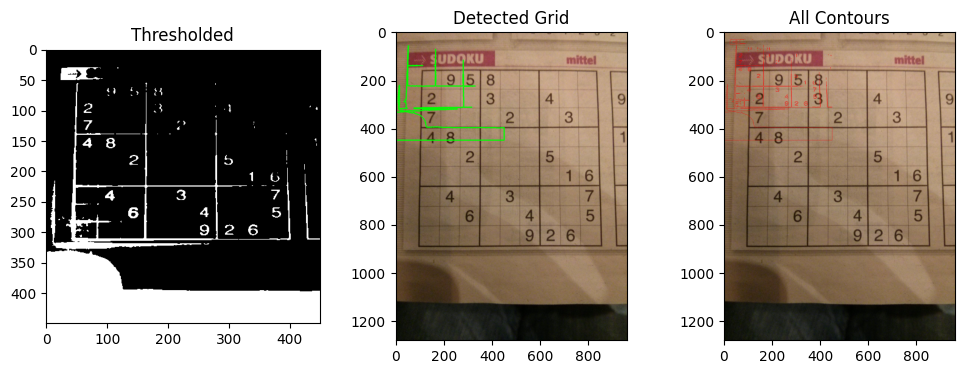

In [19]:
# Your existing code with improved contour filtering
imgPath = os.path.join(path, 'v1_training/v1_training/image1006.jpg')
img = cv2.imread(imgPath)

def preprocess(image):
    image = cv2.resize(image, (450, 450))
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Try different preprocessing for better outer boundary detection
    blur = cv2.GaussianBlur(gray, (5, 5), 0)

    # Invert the image first - sometimes helps with grid detection
    blur = 255 - blur

    # Use different threshold method
    _, threshold_img = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # OR try this adaptive threshold with different parameters
    # threshold_img = cv2.adaptiveThreshold(
    #     blur, 255,
    #     cv2.ADAPTIVE_THRESH_MEAN_C,
    #     cv2.THRESH_BINARY, 15, 3
    # )

    return threshold_img

# Apply preprocessing
threshold = preprocess(img)

# Find contours - try RETR_TREE to get hierarchy
contours, hierarchy = cv2.findContours(threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Filter contours to find the main grid
def find_grid_contour(contours):
    grid_contour = None
    max_area = 0

    for contour in contours:
        area = cv2.contourArea(contour)

        # Look for large contours (outer boundary should be big)
        if area > 10000:  # Increased threshold for outer boundary
            # Get bounding rectangle
            x, y, w, h = cv2.boundingRect(contour)
            aspect_ratio = w / h

            # Check if it's roughly square (Sudoku grids are square)
            if 0.8 < aspect_ratio < 1.2:  # Allow some tolerance
                # Approximate the contour
                epsilon = 0.01 * cv2.arcLength(contour, True)  # Reduced epsilon for better approximation
                approx = cv2.approxPolyDP(contour, epsilon, True)

                # Should be roughly rectangular
                if len(approx) >= 4:  # At least 4 corners
                    if area > max_area:
                        max_area = area
                        grid_contour = contour  # Use original contour, not approximation

    return grid_contour

# Get the main grid contour
grid_contour = find_grid_contour(contours)

# Visualize the result
contour_result = img.copy()

if grid_contour is not None:
    cv2.drawContours(contour_result, [grid_contour], -1, (0, 255, 0), 3)
    print(f"Found grid with area: {cv2.contourArea(grid_contour)}")
    print(f"Grid has {len(grid_contour)} corners")
else:
    print("No suitable grid contour found")
    # If no grid found, try with relaxed parameters
    print("Trying with relaxed parameters...")

    # Show top 3 largest contours for debugging
    sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)[:3]
    for i, contour in enumerate(sorted_contours):
        area = cv2.contourArea(contour)
        epsilon = 0.02 * cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, epsilon, True)
        print(f"Contour {i+1}: Area={area}, Corners={len(approx)}")
        cv2.drawContours(contour_result, [contour], -1, (0, 255, 255), 2)

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(threshold, cmap='gray')
plt.title('Thresholded')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(contour_result, cv2.COLOR_BGR2RGB))
plt.title('Detected Grid')

plt.subplot(1, 3, 3)
# Show all contours in red for comparison
all_contours = img.copy()
cv2.drawContours(all_contours, contours, -1, (0, 0, 255), 1)
plt.imshow(cv2.cvtColor(all_contours, cv2.COLOR_BGR2RGB))
plt.title('All Contours')

plt.show()

Found grid with area: 3615.0
Grid has 40 corners


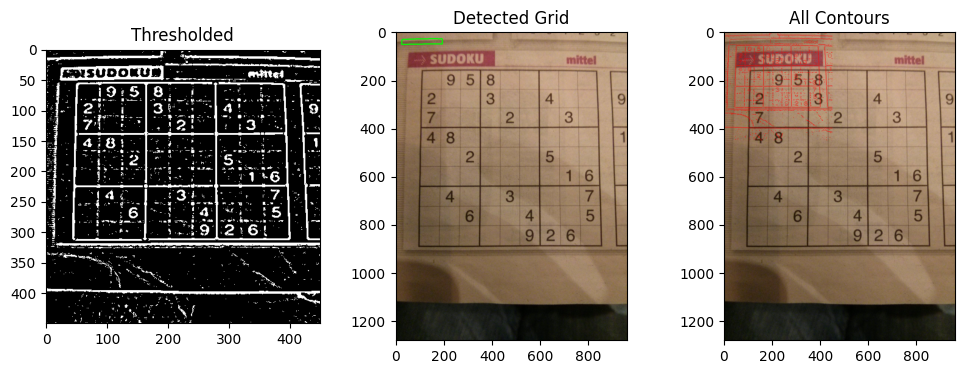

In [20]:
# Your existing code with improved contour filtering
imgPath = os.path.join(path, 'v1_training/v1_training/image1006.jpg')
img = cv2.imread(imgPath)

def preprocess(image):
    image = cv2.resize(image, (450, 450))
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Simple approach - just blur and threshold
    blur = cv2.medianBlur(gray, 5)

    # Try simple binary threshold first
    threshold_img = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
    threshold_img = 255 - threshold_img
    return threshold_img

# Apply preprocessing
threshold = preprocess(img)

# Find contours - back to simple EXTERNAL
contours, hierarchy = cv2.findContours(threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Just get the largest contour - simplest approach
def find_grid_contour(contours):
    if not contours:
        return None

    # Sort by area and take the largest
    largest_contour = max(contours, key=cv2.contourArea)

    # Basic area check
    if cv2.contourArea(largest_contour) > 1000:
        return largest_contour

    return None

# Get the main grid contour
grid_contour = find_grid_contour(contours)

# Visualize the result
contour_result = img.copy()

if grid_contour is not None:
    cv2.drawContours(contour_result, [grid_contour], -1, (0, 255, 0), 3)
    print(f"Found grid with area: {cv2.contourArea(grid_contour)}")
    print(f"Grid has {len(grid_contour)} corners")
else:
    print("No suitable grid contour found")
    # If no grid found, try with relaxed parameters
    print("Trying with relaxed parameters...")

    # Show top 3 largest contours for debugging
    sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)[:3]
    for i, contour in enumerate(sorted_contours):
        area = cv2.contourArea(contour)
        epsilon = 0.02 * cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, epsilon, True)
        print(f"Contour {i+1}: Area={area}, Corners={len(approx)}")
        cv2.drawContours(contour_result, [contour], -1, (0, 255, 255), 2)

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(threshold, cmap='gray')
plt.title('Thresholded')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(contour_result, cv2.COLOR_BGR2RGB))
plt.title('Detected Grid')

plt.subplot(1, 3, 3)
# Show all contours in red for comparison
all_contours = img.copy()
cv2.drawContours(all_contours, contours, -1, (0, 0, 255), 1)
plt.imshow(cv2.cvtColor(all_contours, cv2.COLOR_BGR2RGB))
plt.title('All Contours')

plt.show()

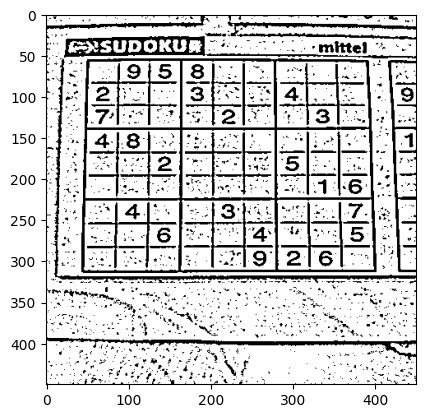

In [21]:
imgPath = os.path.join(path, 'v1_training/v1_training/image1006.jpg')
img = cv2.imread(imgPath)
def preprocess(image):
    image = cv2.resize(image, (450, 450))
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (3, 3), 6)
    # Alternatively, try bilateral filter:
    # blur = cv2.bilateralFilter(gray, 9, 75, 75)
    threshold_img = cv2.adaptiveThreshold(
        blur, 255,
        cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
        cv2.THRESH_BINARY, 11, 2
    )

    return threshold_img

# Apply preprocessing
threshold = preprocess(img)
plt.imshow(threshold, cmap='gray')

In [22]:
def detect_grid_using_lines(thresh_img):
    """Returns a mask highlighting the Sudoku grid using line detection."""
    vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 30))
    horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (30, 1))

    # Detect vertical lines
    vertical_lines = cv2.erode(thresh_img, vertical_kernel, iterations=1)
    vertical_lines = cv2.dilate(vertical_lines, vertical_kernel, iterations=1)

    # Detect horizontal lines
    horizontal_lines = cv2.erode(thresh_img, horizontal_kernel, iterations=1)
    horizontal_lines = cv2.dilate(horizontal_lines, horizontal_kernel, iterations=1)

    # Combine both
    grid_mask = cv2.addWeighted(vertical_lines, 0.5, horizontal_lines, 0.5, 0.0)

    return grid_mask


In [27]:
def preprocess_image(path):
    image = cv2.imread(path)
    image = cv2.resize(image, (450, 450))
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (3, 3), 6)
    thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                   cv2.THRESH_BINARY_INV, 11, 2)
    return image, thresh

def detect_grid_lines(thresh):
    vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 30))
    horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (30, 1))

    vertical = cv2.erode(thresh, vertical_kernel, iterations=1)
    vertical = cv2.dilate(vertical, vertical_kernel, iterations=1)

    horizontal = cv2.erode(thresh, horizontal_kernel, iterations=1)
    horizontal = cv2.dilate(horizontal, horizontal_kernel, iterations=1)

    grid = cv2.addWeighted(vertical, 0.5, horizontal, 0.5, 0.0)
    return grid

def reorder_points(pts):
    pts = pts.reshape((4, 2))
    new_pts = np.zeros((4, 2), dtype="float32")
    s = pts.sum(axis=1)
    new_pts[0] = pts[np.argmin(s)]
    new_pts[2] = pts[np.argmax(s)]
    diff = np.diff(pts, axis=1)
    new_pts[1] = pts[np.argmin(diff)]
    new_pts[3] = pts[np.argmax(diff)]
    return new_pts

def warp_perspective(image, grid_mask):
    contours, _ = cv2.findContours(grid_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for cnt in sorted(contours, key=cv2.contourArea, reverse=True):
        peri = cv2.arcLength(cnt, True)
        approx = cv2.approxPolyDP(cnt, 0.02 * peri, True)
        if len(approx) == 4:
            pts = reorder_points(approx)
            dst = np.array([[0, 0], [449, 0], [449, 449], [0, 449]], dtype="float32")
            M = cv2.getPerspectiveTransform(pts, dst)
            warp = cv2.warpPerspective(image, M, (450, 450))
            return warp
    return None

# === RUN PIPELINE ===



✅ Grid successfully extracted and warped.


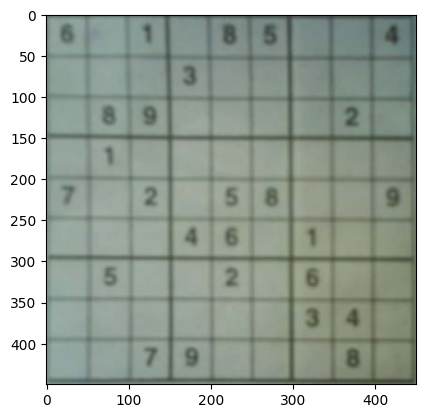

In [37]:
img_path = os.path.join(path, 'v1_training/v1_training/image126.jpg')  # Update this path
image, thresh = preprocess_image(img_path)
grid_mask = detect_grid_lines(thresh)
warped_grid = warp_perspective(image, grid_mask)
if warped_grid is not None:
    print("✅ Grid successfully extracted and warped.")
    plt.imshow(cv2.cvtColor(warped_grid, cv2.COLOR_BGR2RGB))
    plt.show()
else:
    print("❌ Grid could not be found.")

✅ Grid successfully extracted and warped.


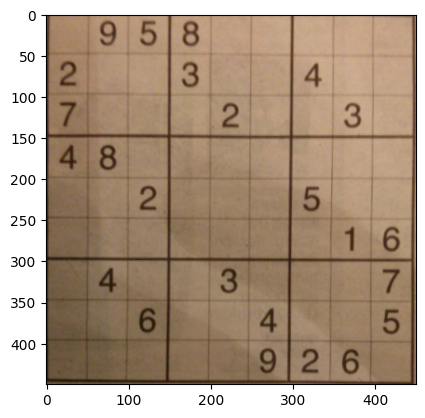

In [69]:
img_path = '/content/Sudoku.jpg'
img_path = os.path.join(path, 'v1_training/v1_training/image1006.jpg')
image, thresh = preprocess_image(img_path)
grid_mask = detect_grid_lines(thresh)
warped_grid = warp_perspective(image, grid_mask)
if warped_grid is not None:
    print("✅ Grid successfully extracted and warped.")
    plt.imshow(cv2.cvtColor(warped_grid, cv2.COLOR_BGR2RGB))
    plt.show()
else:
    print("❌ Grid could not be found.")

In [70]:
def extract_cells(warped_grid, cell_size=50,margin=5):
    """
    Given a 450x450 warped grid image, extract 81 individual 50x50 cells.
    """
    cells = []
    warped_grid = cv2.resize(warped_grid, (450, 450))  # Ensure consistent size

    for row in range(9):
        for col in range(9):
            x_start = col * cell_size
            y_start = row * cell_size
            cell = warped_grid[y_start:y_start + cell_size, x_start:x_start + cell_size]
            cropped = cell[margin:cell_size - margin, margin:cell_size - margin]
            cells.append(cropped)

    return cells  # List of 81 cell images
def display_cells(cells):
    fig, axes = plt.subplots(9, 9, figsize=(10, 10))
    fig.tight_layout(pad=1.0)

    for i, ax in enumerate(axes.flat):
        cell_rgb = cv2.cvtColor(cells[i], cv2.COLOR_BGR2RGB)
        ax.imshow(cell_rgb)
        ax.axis('off')

    plt.show()

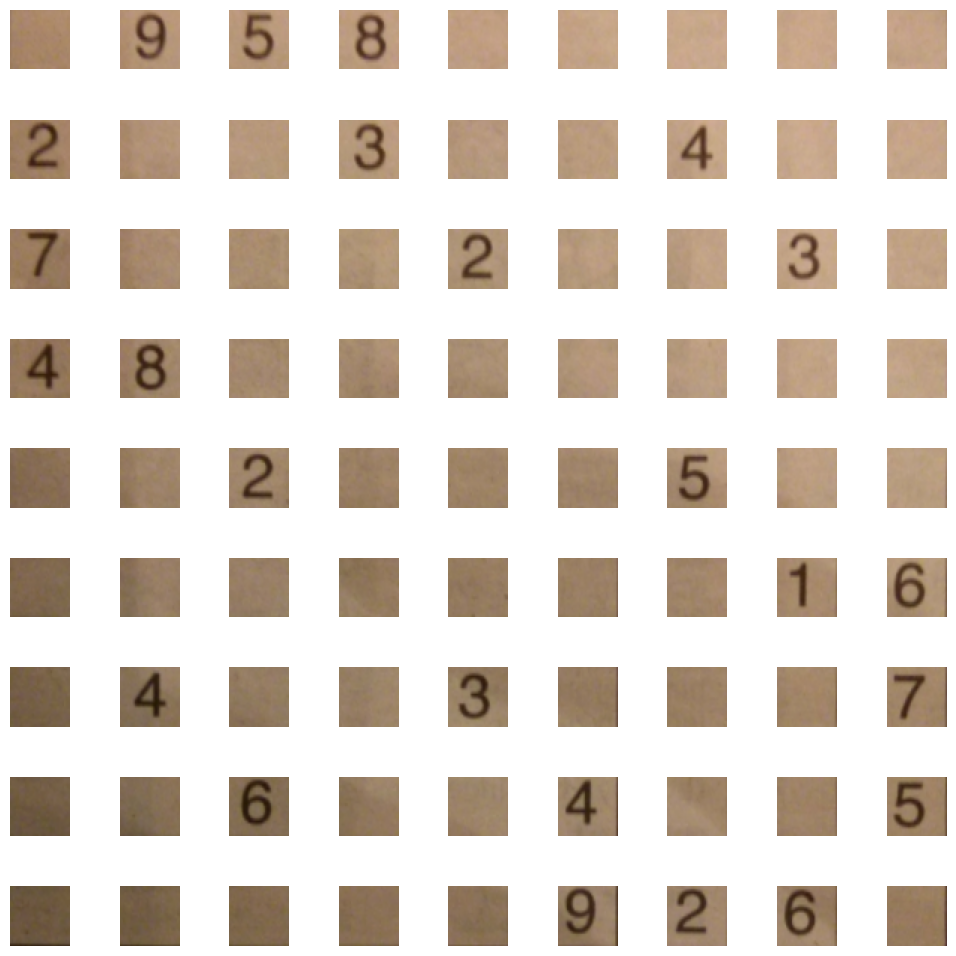

In [85]:
cells = extract_cells(warped_grid)
display_cells(cells)


In [113]:
def readSudokuDat(filePath):
  with open(filePath, 'r') as file:
    lines = file.readlines()
  gridLines = lines[-9:]
  grid = []
  for line in gridLines:
    row = list(map(int, line.strip().split()))
    grid.append(row)
  return grid

def load_labels(dat_path):
    grid = readSudokuDat(dat_path)
    return [j for i in grid for j in i]
def preprocess_digit(cell):
    gray = cv2.cvtColor(cell, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (3, 3), 0)
    _, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if not contours:
        return np.zeros((32, 32), dtype=np.uint8)  # Return blank if no contour found

    c = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(c)

    if w == 0 or h == 0:
        return np.zeros((32, 32), dtype=np.uint8)  # Avoid zero-sized crop

    roi = thresh[y:y + h, x:x + w]

    # Resize and pad to 32x32
    digit = cv2.resize(roi, (20, 20), interpolation=cv2.INTER_AREA)
    padded = np.pad(digit, ((6, 6), (6, 6)), "constant", constant_values=0)
    return padded



In [114]:
X = []
y = []

train_folder = os.path.join(path, 'v1_training/v1_training')

for filename in os.listdir(train_folder):
    if filename.endswith('.jpg'):
        img_path = os.path.join(train_folder, filename)
        dat_path = img_path.replace('.jpg', '.dat')

        # Step 1: Preprocess image using new functions
        image, thresh = preprocess_image(img_path)
        grid_mask = detect_grid_lines(thresh)
        warped = warp_perspective(image, grid_mask)

        if warped is None:
            continue  # skip images where grid could not be warped

        cells = extract_cells(warped)

        # Step 2: Load labels
        labels = load_labels(dat_path)
        if len(labels) != 81 or len(cells) != 81:
            continue

        # Step 3: Preprocess each cell and store it
        for cell, label in zip(cells, labels):
          processed = preprocess_digit(cell)  # this returns already-preprocessed grayscale image
          resized = cv2.resize(processed, (32, 32))  # just in case output is not 32x32
          X.append(resized)
          y.append(label)


In [115]:
X = np.array(X).astype('float32') / 255.0  # Normalize
X = X.reshape(-1, 32, 32, 1)  # Add channel
y = np.array(y)


In [116]:
X_test = []
y_test = []

train_folder = os.path.join(path, 'v1_test/v1_test')

for filename in os.listdir(train_folder):
    if filename.endswith('.jpg'):
        img_path = os.path.join(train_folder, filename)
        dat_path = img_path.replace('.jpg', '.dat')

        # Step 1: Preprocess image using new functions
        image, thresh = preprocess_image(img_path)
        grid_mask = detect_grid_lines(thresh)
        warped = warp_perspective(image, grid_mask)

        if warped is None:
            continue  # skip images where grid could not be warped

        cells = extract_cells(warped)

        # Step 2: Load labels
        labels = load_labels(dat_path)
        if len(labels) != 81 or len(cells) != 81:
            continue

        # Step 3: Preprocess each cell and store it
        for cell, label in zip(cells, labels):
            processed = preprocess_digit(cell)  # this returns already-preprocessed grayscale image
            resized = cv2.resize(processed, (32, 32))
            X_test.append(resized)
            y_test.append(label)


In [117]:
X_test = np.array(X_test).astype('float32') / 255.0  # Normalize
X_test = X_test.reshape(-1, 32, 32, 1)  # Add channel
y_test = np.array(y_test)


In [118]:
print("Total samples:", len(X))
print("Shape of input:", X.shape)
print("Labels range:", np.unique(y))


Total samples: 9396
Shape of input: (9396, 32, 32, 1)
Labels range: [0 1 2 3 4 5 6 7 8 9]


In [119]:
print("Total samples:", len(X_test))
print("Shape of input:", X_test.shape)
print("Labels range:", np.unique(y_test))


Total samples: 3159
Shape of input: (3159, 32, 32, 1)
Labels range: [0 1 2 3 4 5 6 7 8 9]


In [120]:
from tensorflow.keras.layers import BatchNormalization, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)),
    BatchNormalization(),
    MaxPooling2D(),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),
    Dropout(0.3),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [121]:
from tensorflow.keras.callbacks import EarlyStopping

early = EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(X, y, epochs=30, batch_size=64, validation_data=(X_test, y_test), callbacks=[early])


Epoch 1/30
147/147 ━━━━━━━━━━━━━━━━━━━━ 19s 111ms/step - accuracy: 0.8310 - loss: 0.6789 - val_accuracy: 0.0696 - val_loss: 6.0678
Epoch 2/30
147/147 ━━━━━━━━━━━━━━━━━━━━ 17s 119ms/step - accuracy: 0.9700 - loss: 0.1347 - val_accuracy: 0.2422 - val_loss: 4.6128
Epoch 3/30
147/147 ━━━━━━━━━━━━━━━━━━━━ 20s 112ms/step - accuracy: 0.9765 - loss: 0.1176 - val_accuracy: 0.8284 - val_loss: 0.5993
Epoch 4/30
147/147 ━━━━━━━━━━━━━━━━━━━━ 21s 115ms/step - accuracy: 0.9815 - loss: 0.0937 - val_accuracy: 0.9820 - val_loss: 0.1162
Epoch 5/30
147/147 ━━━━━━━━━━━━━━━━━━━━ 20s 114ms/step - accuracy: 0.9839 - loss: 0.0905 - val_accuracy: 0.9877 - val_loss: 0.0604
Epoch 6/30
147/147 ━━━━━━━━━━━━━━━━━━━━ 20s 108ms/step - accuracy: 0.9822 - loss: 0.0839 - val_accuracy: 0.9873 - val_loss: 0.0601
Epoch 7/30
147/147 ━━━━━━━━━━━━━━━━━━━━ 16s 110ms/step - accuracy: 0.9841 - loss: 0.0763 - val_accuracy: 0.9880 - val_loss: 0.0676
Epoch 8/30
147/147 ━━━━━━━━━━━━━━━━━━━━ 22s 117ms/step - accuracy: 0.9867 - loss: 0

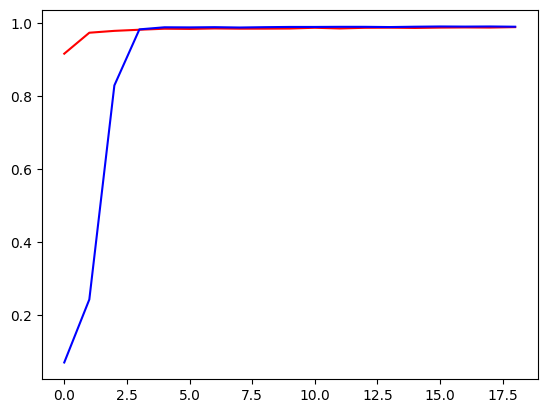

In [122]:
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')

In [123]:
model.save("final_sudoku.h5")


✅ Grid successfully extracted and warped.


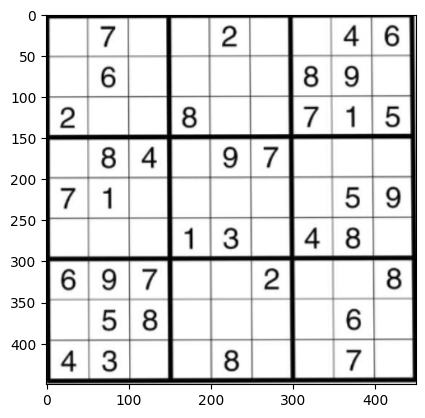

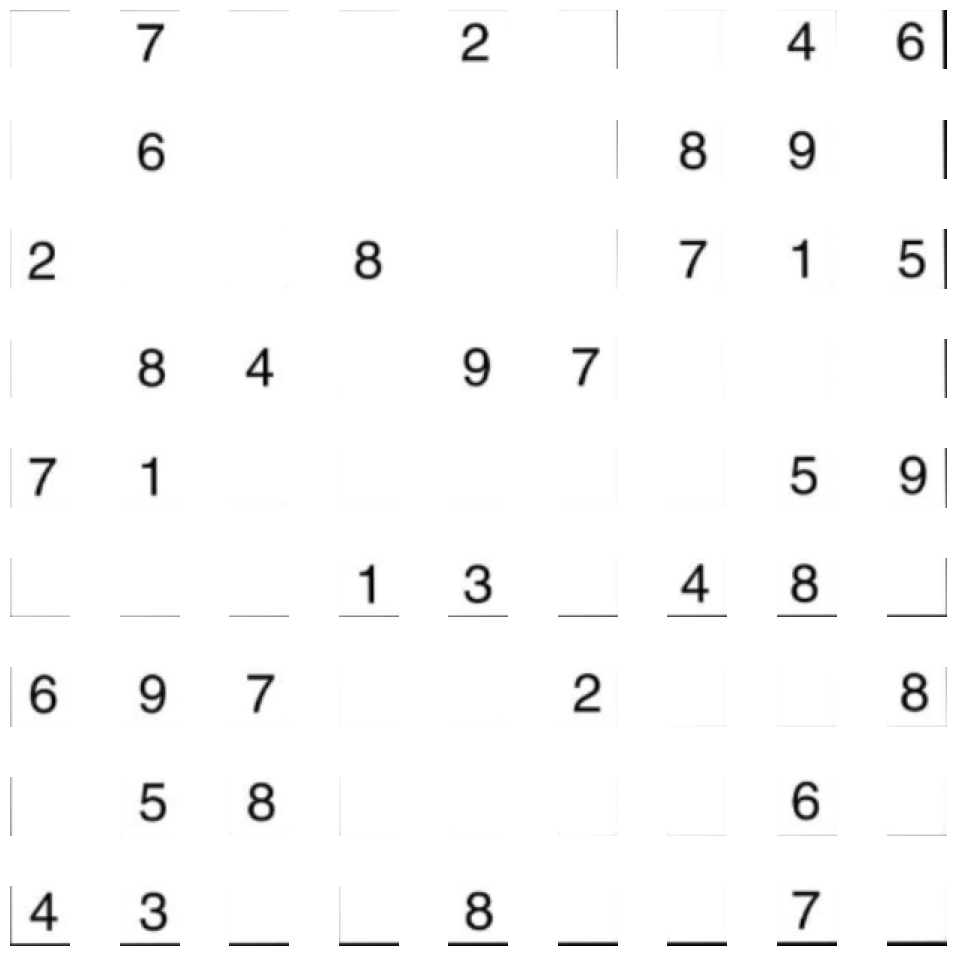

In [131]:
img_path = os.path.join(path, 'v1_training/v1_training/image1006.jpg')
img_path = '/content/Sudoku.jpg'
image, thresh = preprocess_image(img_path)
grid_mask = detect_grid_lines(thresh)
warped_grid = warp_perspective(image, grid_mask)
if warped_grid is not None:
    print("✅ Grid successfully extracted and warped.")
    plt.imshow(cv2.cvtColor(warped_grid, cv2.COLOR_BGR2RGB))
    plt.show()
else:
    print("❌ Grid could not be found.")
cells = extract_cells(warped_grid)
display_cells(cells)

In [132]:
def predict_digit(cell_img, model):
    processed = preprocess_digit(cell_img)  # Already 32x32 and normalized shape
    norm = processed.astype("float32") / 255.0
    norm = norm.reshape(1, 32, 32, 1)

    prediction = model.predict(norm, verbose=0)
    digit = np.argmax(prediction)
    confidence = np.max(prediction)

    if confidence < 0.5:
        return 0  # Treat as empty cell
    return digit


In [133]:
sudoku_grid = []
for i in range(9):
    row = []
    for j in range(9):
        idx = i * 9 + j
        digit = predict_digit(cells[idx], model)
        row.append(int(digit))
    sudoku_grid.append(row)

# Display the predicted grid
for row in sudoku_grid:
    print(row)


[0, 7, 0, 0, 2, 0, 0, 4, 6]
[0, 6, 0, 0, 0, 0, 8, 9, 0]
[2, 0, 0, 8, 0, 0, 7, 1, 5]
[0, 8, 4, 0, 9, 7, 0, 0, 0]
[7, 1, 0, 0, 0, 0, 0, 5, 9]
[0, 0, 0, 1, 3, 0, 4, 8, 0]
[6, 9, 7, 0, 0, 2, 0, 0, 8]
[0, 5, 8, 0, 0, 0, 0, 6, 0]
[4, 3, 0, 0, 8, 0, 0, 7, 0]


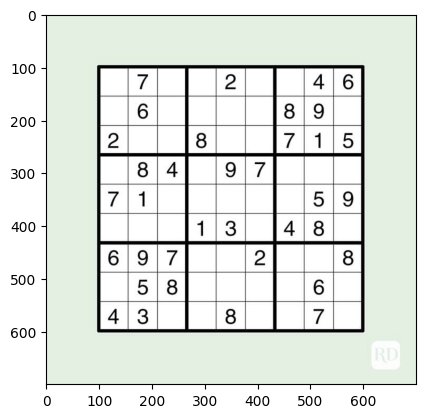

In [135]:
img_path = os.path.join(path, 'v1_training/v1_training/image1006.jpg')
img_path = '/content/Sudoku.jpg'
plt.imshow(cv2.imread(img_path))